In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [6]:
df.head() #observam multe coloane, fiecare cu un "calificativ", care poate fi redus la un numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.columns #hai sa ne uitam dupa valori nule

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df.describe()# cautam caracterisitici nule, dar nu se afiseaza chair toate caracterisiticle

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.isnull().sum() #obersvam ca avem valori lipsa la Teacher_Quality, Parental_Education_Level, Distance_from_Home
#cred ca cel mai bine ar fi sa convertim la numeric datele pentru a le analiza daca sunt MAR sau MNAR

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Text(0.5, 1.0, 'Missing values heat Map')

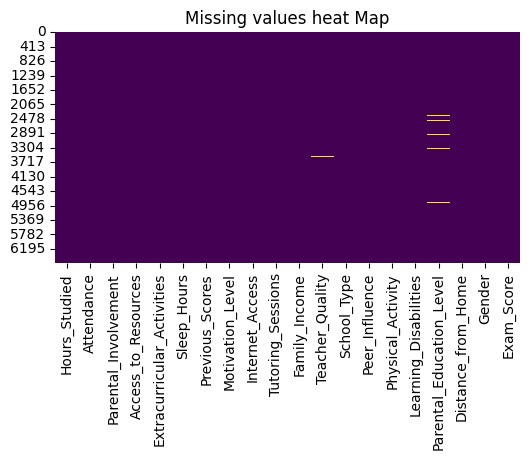

In [10]:
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values heat Map")
#valorile par destul de aleator raspandite, deci nu pare a fi o eroare sistemica inca

In [11]:
# hai sa convertim datele in numeric

#Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions,
#Physical_activity si Exam_Score raman la fel

#Parental_Involvement, Acces_to_Rescources, Extracurricular_Activities, Motivation_level,
#Teacher_Quality, Familiy_Income  devin 0-low, 1-medium, 3-high

#Internet_Acces, School_Type, Learning_Disability, Gender devine de tip boolean Yes-True, No-False

#Peer_Presure devine 0-Negative,1-Neutral,2-Positive

#Parental_Education_level devine 0-Highschool, 1-Collage, 2-PostGraduate

#Distance_From_Home devine Near-0, Moderate-1, Far-2

In [29]:
df_numeric = df.copy()

# 1. Definirea mapărilor
level_mapping = {'Low': 0, 'Medium': 1, 'High': 3}
bool_mapping = {'Yes': True, 'No': False}
peer_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
edu_mapping = {'High School': 0, 'College': 1, 'Postgraduate': 2}
dist_mapping = {'Near': 0, 'Moderate': 1, 'Far': 2}

# 2. Coloane cu nivel (0, 1, 3) - Am scos Extracurricular de aici
cols_to_map = [
    'Parental_Involvement', 'Access_to_Resources', 
    'Motivation_Level', 'Teacher_Quality', 'Family_Income'
]
for col in cols_to_map:
    df_numeric[col] = df[col].map(level_mapping)

# 3. Coloane Booleene (Adăugat Extracurricular_Activities aici)
bool_cols = ['Internet_Access', 'Learning_Disabilities', 'Extracurricular_Activities'] 
for col in bool_cols:
    df_numeric[col] = df[col].map(bool_mapping)

# 4. Gen și Școală
df_numeric['School_Type'] = df['School_Type'].map({'Public': True, 'Private': False})
df_numeric['Gender'] = df['Gender'].map({'Male': True, 'Female': False})

# 5. Categorii specifice (Atenție la Peer_Influence și f-mic la from)
df_numeric['Peer_Influence'] = df['Peer_Influence'].map(peer_mapping)
df_numeric['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_mapping)
df_numeric['Distance_from_Home'] = df['Distance_from_Home'].map(dist_mapping)

# Verificăm dacă transformarea a decurs bine
df_numeric

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,3,False,7,73,0,True,0,0,1.0,True,2,3,False,0.0,0.0,True,67
1,19,64,0,1,False,8,59,0,True,2,1,1.0,True,0,4,False,1.0,1.0,False,61
2,24,98,1,1,True,7,91,1,True,2,1,1.0,True,1,4,False,2.0,0.0,True,74
3,29,89,0,1,True,8,98,1,True,1,1,1.0,True,0,4,False,0.0,1.0,True,71
4,19,92,1,1,True,6,65,1,True,3,1,3.0,True,1,4,False,1.0,0.0,False,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,3,1.0,True,2,2,False,0.0,0.0,False,68
6603,23,76,3,1,False,8,81,1,True,3,0,3.0,True,2,2,False,0.0,0.0,False,69
6604,20,90,1,0,True,6,65,0,True,3,0,1.0,True,0,2,False,2.0,0.0,False,68
6605,10,86,3,3,True,6,91,3,True,2,0,1.0,False,2,3,False,0.0,2.0,False,68


In [ ]:
#avand in vedere ca valorile lipsa sunt destul de mici fata de celalte valori
#cred ca cel mai ok ar fi sa le inlocium cu mediana

In [31]:
teacher_median = df_numeric['Teacher_Quality'].median()
parental_edu_median = df_numeric['Parental_Education_Level'].median()
distance_median = df_numeric['Distance_from_Home'].median()

df_numeric['Teacher_Quality'] = df_numeric['Teacher_Quality'].fillna(teacher_median)
df_numeric['Parental_Education_Level'] = df_numeric['Parental_Education_Level'].fillna(parental_edu_median)
df_numeric['Distance_from_Home'] = df_numeric['Distance_from_Home'].fillna(distance_median)

df_numeric

Verificare valori nule după imputare:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,3,False,7,73,0,True,0,0,1.0,True,2,3,False,0.0,0.0,True,67
1,19,64,0,1,False,8,59,0,True,2,1,1.0,True,0,4,False,1.0,1.0,False,61
2,24,98,1,1,True,7,91,1,True,2,1,1.0,True,1,4,False,2.0,0.0,True,74
3,29,89,0,1,True,8,98,1,True,1,1,1.0,True,0,4,False,0.0,1.0,True,71
4,19,92,1,1,True,6,65,1,True,3,1,3.0,True,1,4,False,1.0,0.0,False,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,3,1,False,7,76,1,True,1,3,1.0,True,2,2,False,0.0,0.0,False,68
6603,23,76,3,1,False,8,81,1,True,3,0,3.0,True,2,2,False,0.0,0.0,False,69
6604,20,90,1,0,True,6,65,0,True,3,0,1.0,True,0,2,False,2.0,0.0,False,68
6605,10,86,3,3,True,6,91,3,True,2,0,1.0,False,2,3,False,0.0,2.0,False,68


In [33]:
print(df_numeric.duplicated().sum()+" duplicate")

0


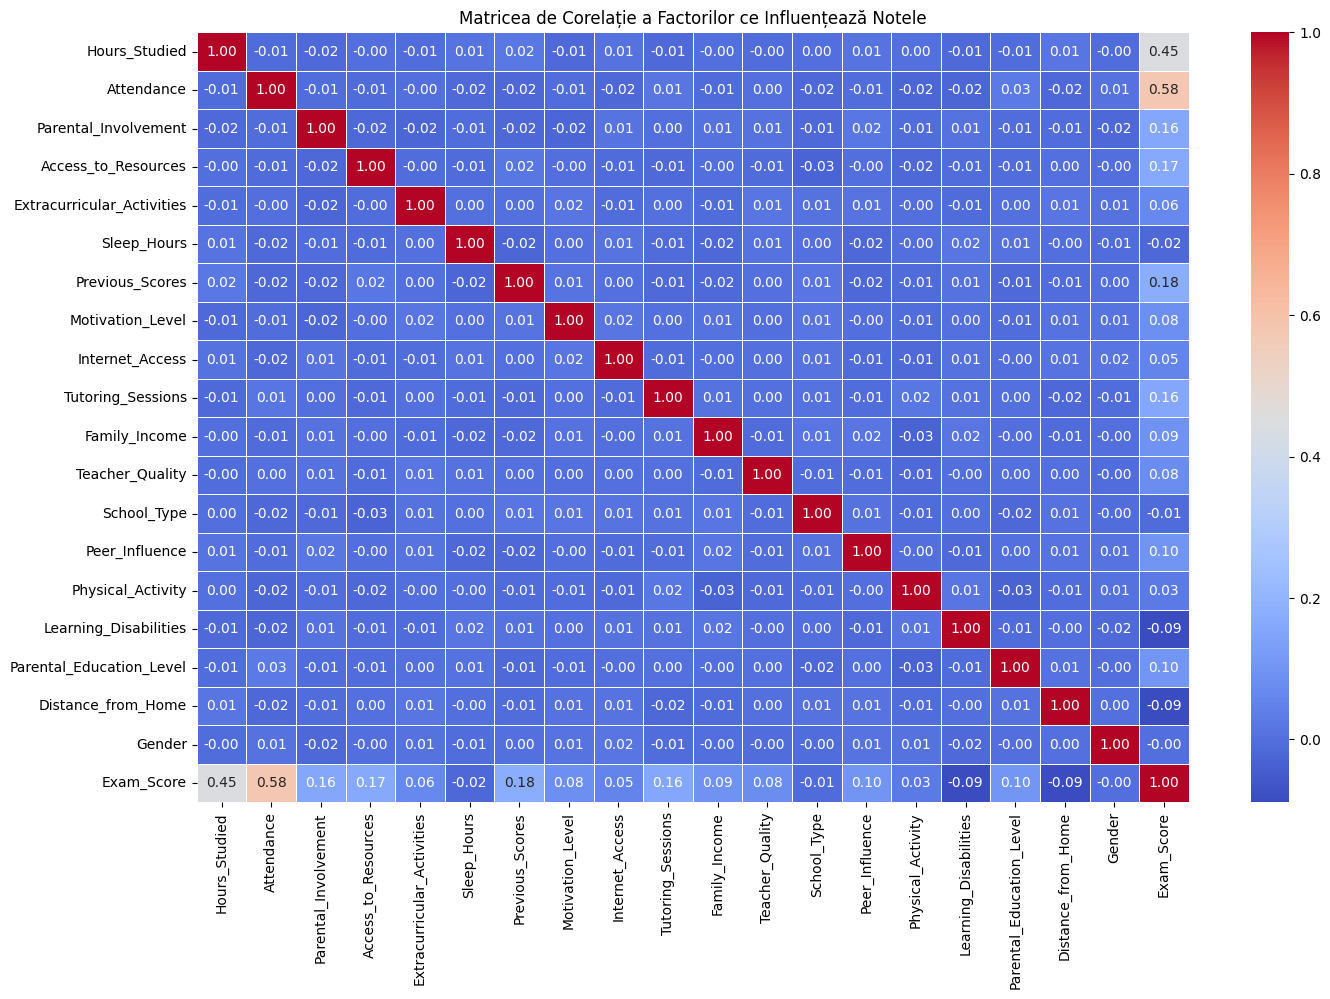

In [34]:
corr_matrix=df_numeric.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matricea de Corelație a Factorilor ce Influențează Notele')
plt.show()
#cele mai considerabile corelatii pentru nota finala sunt: orele studiate si prezenta
#totusi avem inca mult zgomot in date

In [38]:
df_simplified=df_numeric.copy()